In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree



# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys


sys.path.append(os.path.abspath("../../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("..\..\..\datos\datos2\datos_clusterizados2_escalado.csv", index_col=0)

In [3]:
df_encoded.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_robust,Country_robust,Category_robust,Sub-Category_robust,Discount_robust
0,390.46,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.44,0.18,1.00,0.85,0.50
1,377.73,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.56,0.86,1.16,1.61,0.00
2,520.59,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.83,0.70,1.00,0.85,0.00
3,953.61,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.22,0.70,1.00,2.38,0.00
4,924.36,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.93,-0.70,0.00,-0.15,1.00


Separamos en x e y

In [4]:
x= df_encoded.drop(columns="Sales_unitario")
y= df_encoded[["Sales_unitario"]]

Separamos en train y test y le hacemos aprender

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [6]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

***K-Fold***

In [7]:
f.metricas(y_train, y_train_pred, y_test, y_test_pred)

,train,test
r2_score,0.38,0.41
MAE,49.88,49.26
MSE,"9,058.72","7,427.22"
RMSE,95.18,86.18


In [8]:
kf= KFold(n_splits=5,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.38544977352093035

In [9]:
score_mae= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_absolute_error")
abs(np.mean(score_mae))

50.06008392364314

In [10]:
score_mse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_squared_error")
abs(np.mean(score_mse))

8632.636258788134

In [11]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

92.52706952441939

In [12]:
kf= KFold(n_splits=200,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.40725724403744606

In [13]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

88.87038852922628

**Como seleccionar que variables independientes eliminar si sucede over fitting**

In [14]:

df_coefs=pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coefs.sort_values(by=0, key= abs, ascending=False)    #para que ordene según la importancia

,0
Ship Mode_Same Day,"85,365,736,590,056.28"
Ship Mode_First Class,"85,365,736,590,052.44"
Ship Mode_Second Class,"85,365,736,590,051.62"
Ship Mode_Standard Class,"85,365,736,590,050.89"
Segment_Home Office,"23,814,657,291,210.81"
Segment_Consumer,"23,814,657,291,209.98"
Segment_Corporate,"23,814,657,291,209.23"
Order Priority_Low,"11,318,579,634,704.54"
Order Priority_Medium,"11,318,579,634,700.50"
Order Priority_High,"11,318,579,634,699.86"


### Como ya me di cuenta de que no parece ser una relación lineal paso a decision tree

**DECISION TREE**  
Separa los datos en nodos y luego hace la media en el nodo final de la variable dependiente para los datos que se encuentran en ese nodo y cuando tenga que predecir, si el dato acaba en ese nodo, se le aplicará esa media como valor de su variable dependiente.  
   
***Para elegir el mejor árbol de decisión (conformado de unas variables independientes concretas)***   
Calcula la suma de los errores al cuadrado dividido entre n del nodo final de cada arbol y compara ese error y se queda con el que tenga el error mínimo
  
- Si hay mucha profundidad, los nodos finales van a ser tan específicos que se va a dar over fitting
  
***Como decirle que pare de dividir para evitar el Over Fitting***  
- max_depth (profundida máxima del árbol)
- min_sample_split (numero de datos minimo en el nodo (madre) para que se pueda dividir)  
- min_sample_leaf (numero de datos minimo que tienen que tener los nodos(hijos) en los que me divido) 
- max_leaf_nodes (numero maximo de nodos que quiero que tenga mi arbol)  
- max_features (numero máximo de variables independientes que queremos)

Pruebo primero a ver cómo me lo hace 

In [15]:
modelo_arbol_vacio= DecisionTreeRegressor()         
modelo_arbol_vacio.fit(x_train, y_train)
y_pred_test_arb_vacio= modelo_arbol_vacio.predict(x_test)
y_pred_train_arb_vacio= modelo_arbol_vacio.predict(x_train)
df_metricas_arbol_vacio= f.metricas(y_train, y_pred_train_arb_vacio, y_test, y_pred_test_arb_vacio)
df_metricas_arbol_vacio

,train,test
r2_score,0.99,-0.17
MAE,0.89,57.89
MSE,76.34,"14,607.92"
RMSE,8.74,120.86


Dejándole a él sólo me da que se produce overfitting

In [16]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [3, 5, 7,200],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 200]
}

grid_search_arbol=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 200],
                         'max_leaf_nodes': [4, 6, 8, 10, 20, 200],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [17]:
modelo_final_arbol=grid_search_arbol.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=200, min_samples_leaf=100,
                      min_samples_split=50)

In [18]:
y_pred_test_arb= modelo_final_arbol.predict(x_test)
y_pred_train_arb= modelo_final_arbol.predict(x_train)
df_metricas_arbol= f.metricas(y_train, y_pred_train_arb, y_test, y_pred_test_arb)
df_metricas_arbol=df_metricas_arbol.T
df_metricas_arbol.reset_index(inplace=True)
df_metricas_arbol



,index,r2_score,MAE,MSE,RMSE
0,train,0.43,43.29,"8,243.65",90.79
1,test,0.46,43.52,"6,791.59",82.41


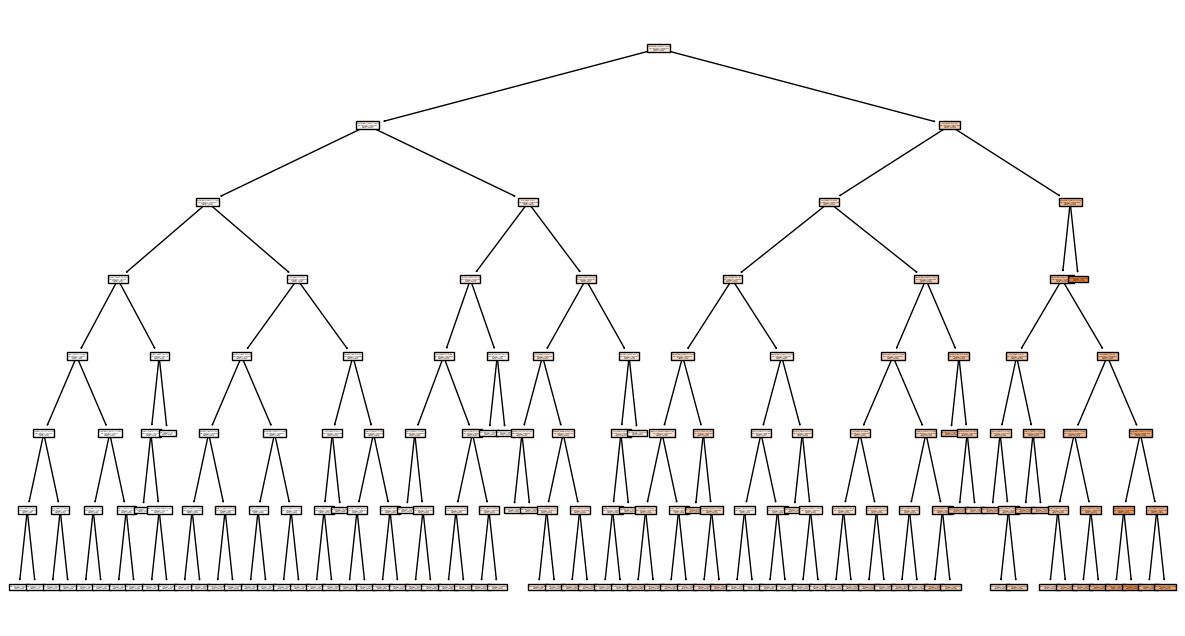

In [19]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol, feature_names=x.columns, filled=True);

### **Este es el modelo inicial sobre el que cambiar los parametros para mejorar las métricas y por ende el modelo**

### Vamos a graficarlo porque así se entienden mejor

In [20]:
df_resultados_arbol=pd.DataFrame(grid_search_arbol.cv_results_)

In [21]:
df_resultados_arbol.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
281,0.20,0.01,0.01,0.00,7,200,100,50,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...","-6,804.66","-7,296.77","-10,084.29","-10,364.17","-8,206.91","-8,551.36","1,440.82",1
282,0.20,0.01,0.01,0.00,7,200,100,100,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...","-6,804.66","-7,296.77","-10,084.29","-10,364.17","-8,206.91","-8,551.36","1,440.82",1


In [22]:
df_resultados_arbol.shape   #no da el número de modelos que ha generado el árbol 

(384, 17)

In [23]:
df_resultados_arbol_filtrado=df_resultados_arbol.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado["MSE"]= df_resultados_arbol["mean_test_score"]
df_resultados_arbol_filtrado.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,4,10,10,"-9,325.89"
1,3,4,10,50,"-9,325.89"
2,3,4,10,100,"-9,325.89"
3,3,4,10,200,"-9,325.89"
4,3,4,50,10,"-9,325.89"


In [24]:
df_rmse_profun= np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun.head()

,param_max_depth,MSE
0,3,94.99
1,5,94.24
2,7,94.21
3,200,94.33


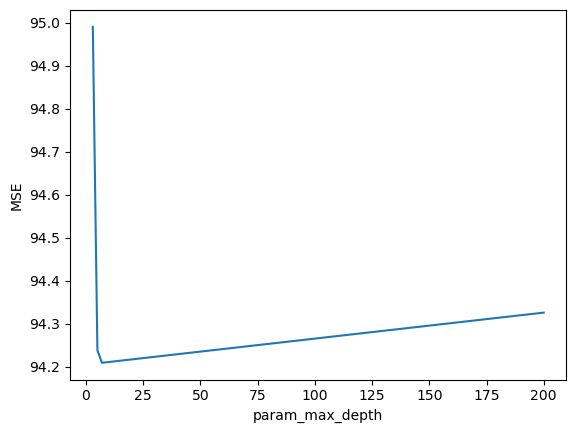

In [25]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun);

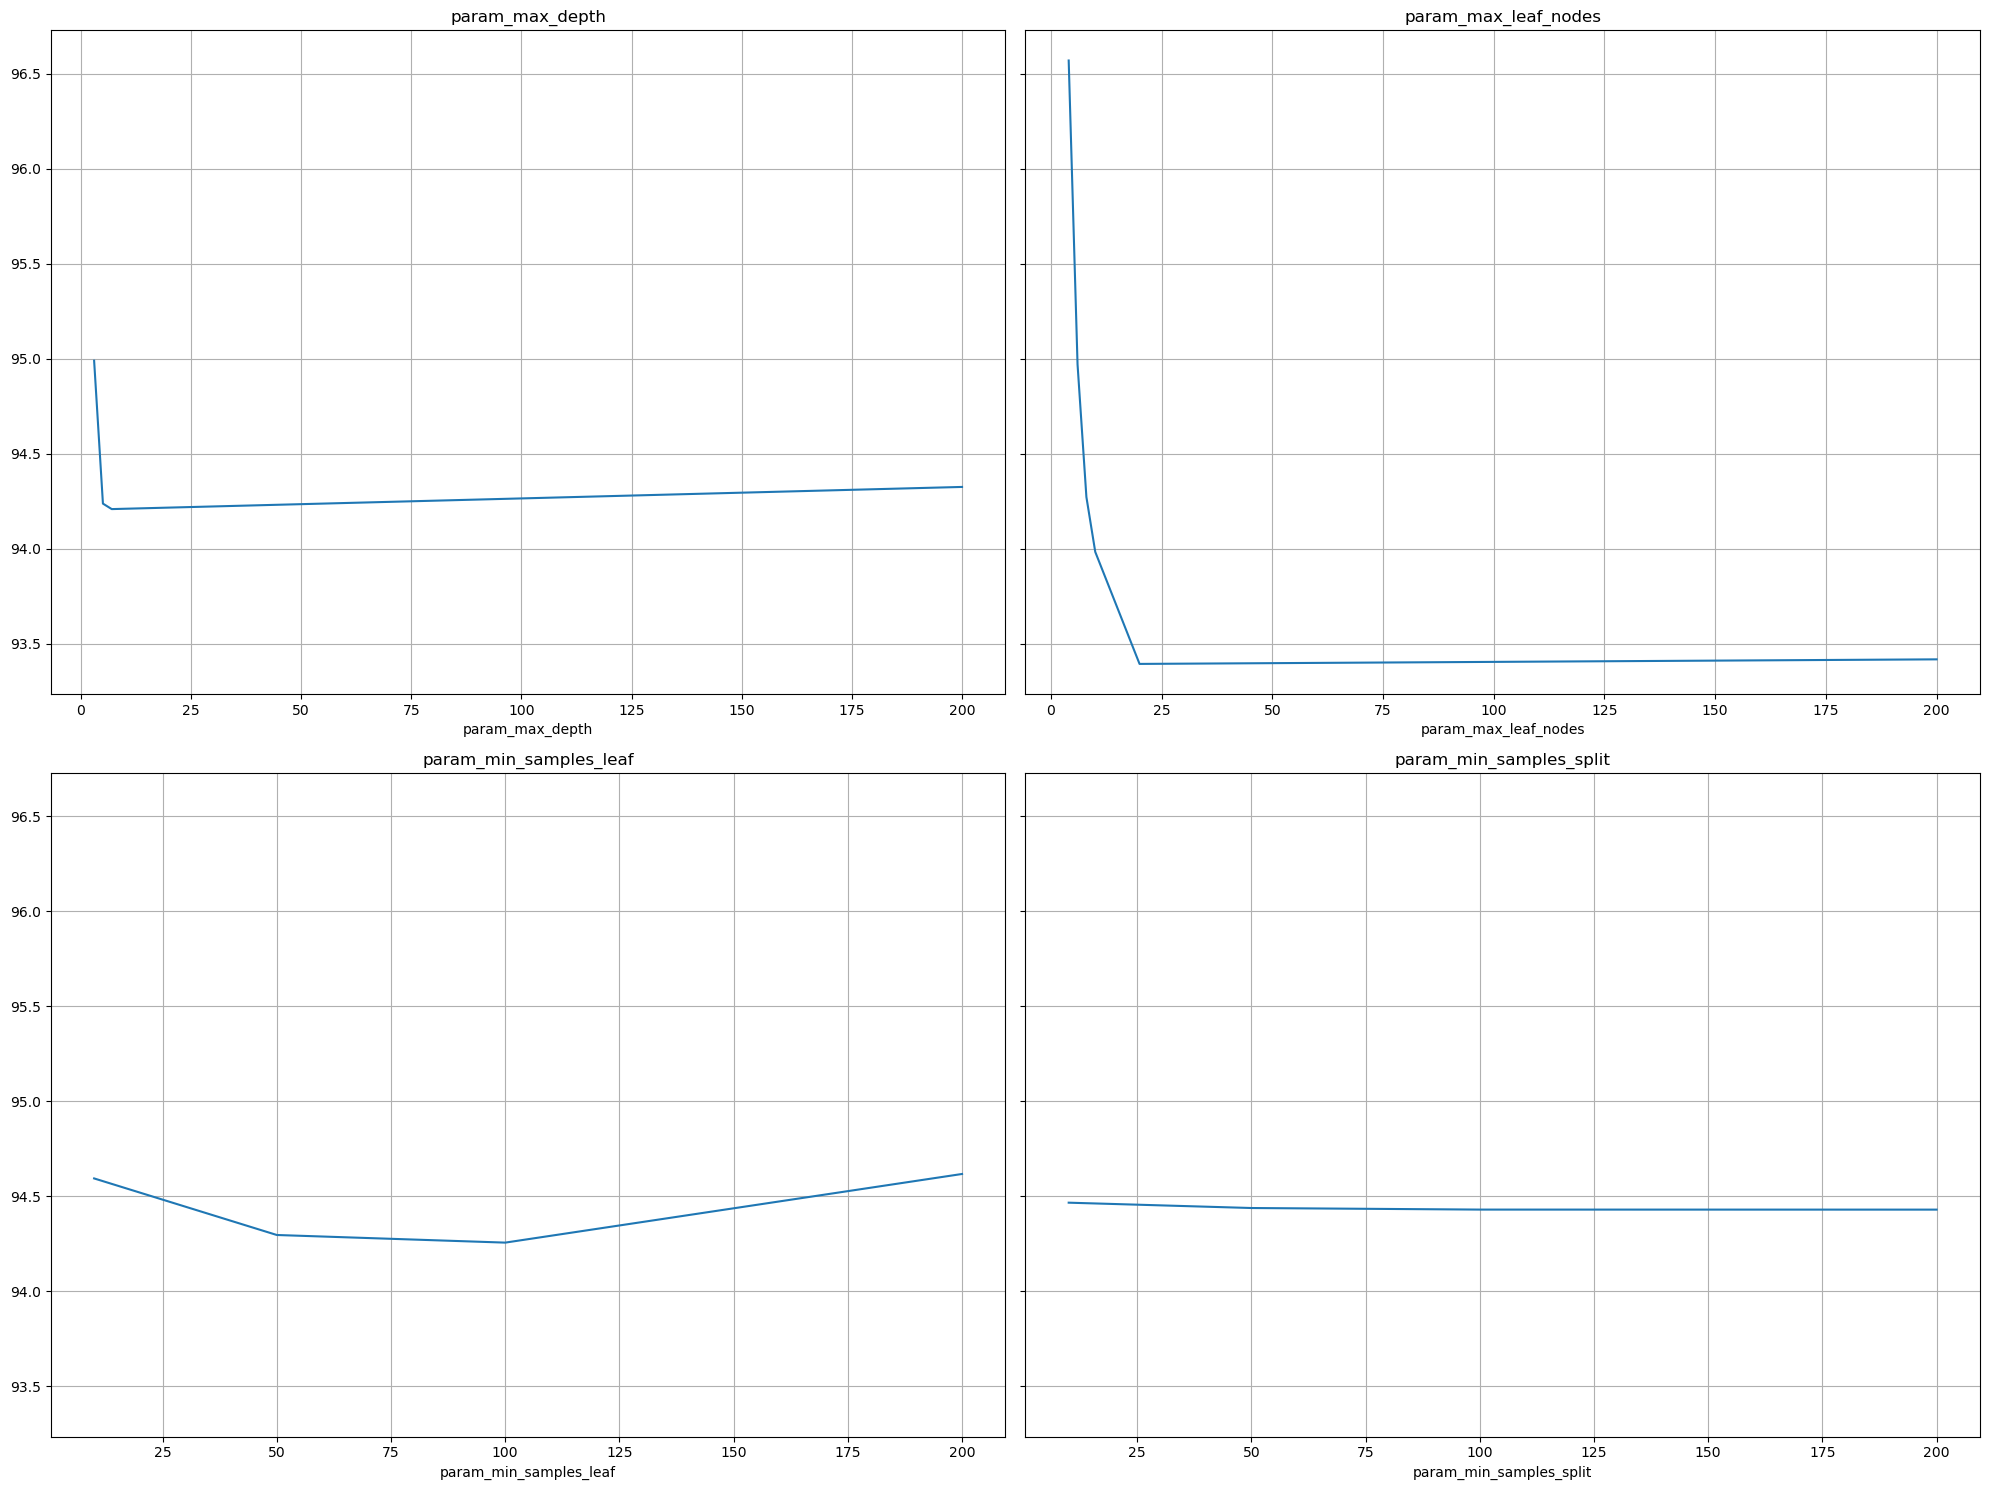

In [26]:

df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [28]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
Sub-Category_robust,0.77
City_robust,0.20
Country_robust,0.01
Discount_robust,0.01
Category_robust,0.00


## Lo pruebo cambiando parametros

In [29]:
# Parámetros a evaluar
params_arbol_prueba = {
    'max_depth': [6,7,8],
    'min_samples_split': [5,6,7,8,9,10],
    'min_samples_leaf': [30,50,60,70,80],
    'max_leaf_nodes': [100,150, 190]
}

grid_search_arbol_prueba=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol_prueba , cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol_prueba.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8],
                         'max_leaf_nodes': [100, 150, 190],
                         'min_samples_leaf': [30, 50, 60, 70, 80],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [30]:
modelo_final_arbol_prueba=grid_search_arbol_prueba.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol_prueba

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=150, min_samples_leaf=30,
                      min_samples_split=6)

In [31]:
y_pred_test_arb_prueba= modelo_final_arbol_prueba.predict(x_test)
y_pred_train_arb_prueba= modelo_final_arbol_prueba.predict(x_train)
df_metricas_arbol_prueba= f.metricas(y_train, y_pred_train_arb_prueba, y_test, y_pred_test_arb_prueba)

df_metricas_arbol_prueba=df_metricas_arbol_prueba.T
df_metricas_arbol_prueba.reset_index(inplace=True)
df_metricas_arbol_prueba

,index,r2_score,MAE,MSE,RMSE
0,train,0.44,43.51,"8,140.85",90.23
1,test,0.45,43.73,"6,898.32",83.06


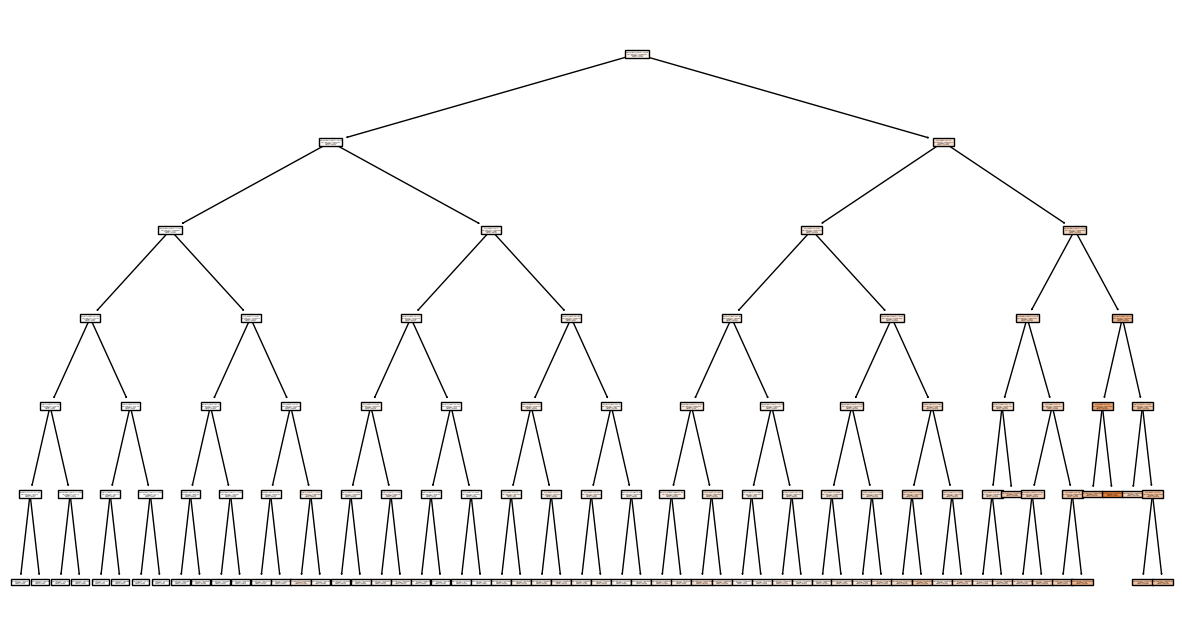

In [32]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol_prueba, feature_names=x.columns, filled=True);

### Vamos a graficarlo porque así se entienden mejor

In [33]:
df_resultados_arbol_prueba=pd.DataFrame(grid_search_arbol_prueba.cv_results_)

In [34]:
df_resultados_arbol_prueba.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
62,0.16,0.01,0.01,0.00,6,190,30,7,"{'max_depth': 6, 'max_leaf_nodes': 190, 'min_s...","-6,632.04","-7,215.09","-10,063.43","-10,382.67","-8,095.82","-8,477.81","1,502.66",1
35,0.15,0.01,0.01,0.00,6,150,30,10,"{'max_depth': 6, 'max_leaf_nodes': 150, 'min_s...","-6,632.04","-7,215.09","-10,063.43","-10,382.67","-8,095.82","-8,477.81","1,502.66",1


In [35]:
df_resultados_arbol_prueba.shape   #no da el número de modelos que ha generado el árbol 

(270, 17)

In [36]:
df_resultados_arbol_filtrado_prueba=df_resultados_arbol_prueba.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_prueba["MSE"]= df_resultados_arbol_prueba["mean_test_score"]
df_resultados_arbol_filtrado_prueba.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,6,100,30,5,"-8,477.81"
1,6,100,30,6,"-8,477.81"
2,6,100,30,7,"-8,477.81"
3,6,100,30,8,"-8,477.81"
4,6,100,30,9,"-8,477.81"


In [37]:
df_rmse_profun_prueba= np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_prueba.head()

,param_max_depth,MSE
0,6,92.27
1,7,92.60
2,8,92.70


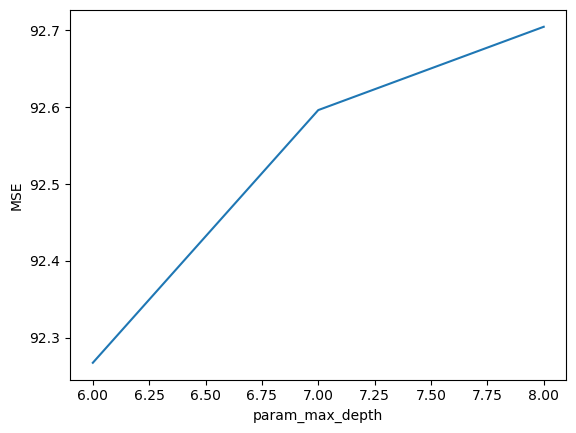

In [38]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_prueba);

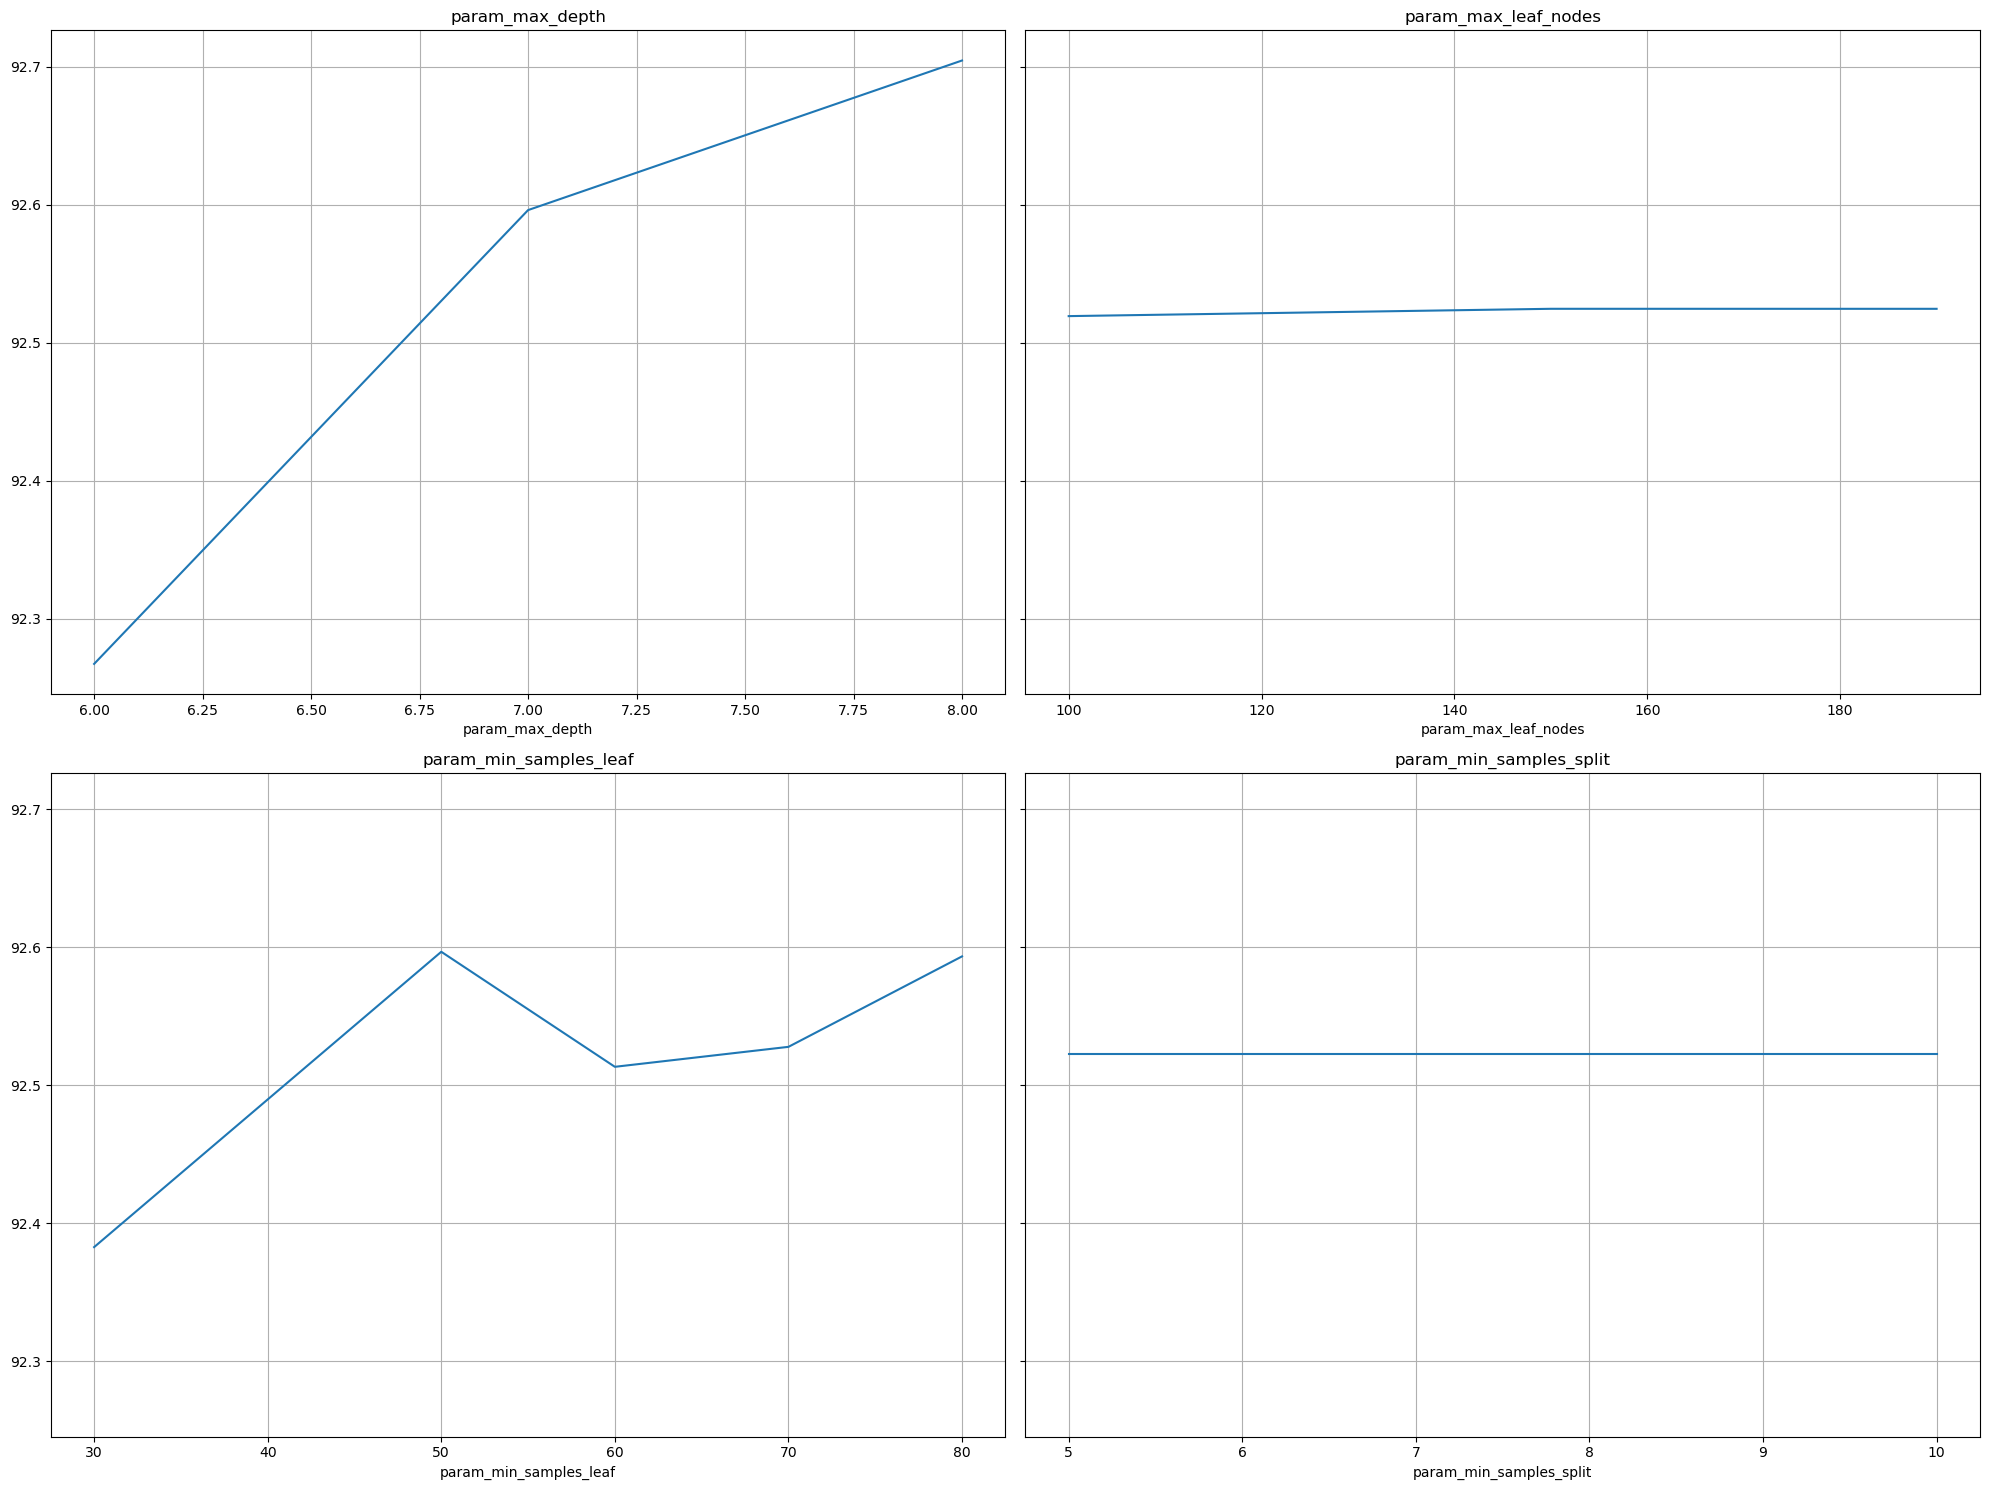

In [39]:

df_rmse_profun_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_prueba = pd.DataFrame(df_rmse_profun_prueba).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_prueba.columns[:-1]):
    df_rmse_col_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_prueba.index, y=df_rmse_col_prueba.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [40]:
pd.DataFrame(modelo_final_arbol_prueba.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
Sub-Category_robust,0.75
City_robust,0.21
Discount_robust,0.02
Country_robust,0.01
Category_robust,0.00


**probamos una última combinación de parametros para el modelo**

PARA PODER COMPARAR MEJOR LOS MODELOS

In [41]:
dicc={0: "modelo1",
      1: "modelo1",
      2: "modelo2",
      3: "modelo2"}

In [42]:
df_final=pd.DataFrame()
df_final=pd.concat([df_final,df_metricas_arbol,df_metricas_arbol_prueba], axis=0, ignore_index=True)
df_final.reset_index(inplace=True)
df_final["level_0"]=df_final["level_0"].map(dicc)
df_final['diff_r2_score'] = df_final.groupby('level_0')['r2_score'].transform(lambda x: x.iloc[0] - x.iloc[1])
df_final['diff_RMSE'] = df_final.groupby('level_0')['RMSE'].transform(lambda x: x.iloc[0] - x.iloc[1])

df_final

,level_0,index,r2_score,MAE,MSE,RMSE,diff_r2_score,diff_RMSE
0,modelo1,train,0.43,43.29,"8,243.65",90.79,-0.02,8.38
1,modelo1,test,0.46,43.52,"6,791.59",82.41,-0.02,8.38
2,modelo2,train,0.44,43.51,"8,140.85",90.23,-0.01,7.17
3,modelo2,test,0.45,43.73,"6,898.32",83.06,-0.01,7.17


## Elección de mejor modelo:  
Comparando los modelos nos damos cuenta que el modelo mejor equilibrado es el modelo 2 (tiene metricas bastante buenas en compración y el menor over fitting).  
  
**Finalmente me quedo con el modelo 2 correspondiente al último modelo**

In [43]:
df_metricas_arbol_prueba.drop(columns= "index", inplace=True)

In [44]:
df_metricas_ulti=df_metricas_arbol_prueba.T
df_metricas_ulti.columns= ["train", "test"]
df_metricas_ulti.reset_index(inplace=True)
df_metricas_ulti

,index,train,test
0,r2_score,0.44,0.45
1,MAE,43.51,43.73
2,MSE,"8,140.85","6,898.32"
3,RMSE,90.23,83.06


In [45]:
df_metricas_ulti

,index,train,test
0,r2_score,0.44,0.45
1,MAE,43.51,43.73
2,MSE,"8,140.85","6,898.32"
3,RMSE,90.23,83.06


Vamos a intentar visualizar las cositas

In [46]:
predytest=pd.DataFrame(y_pred_test_arb_prueba, columns=["y_pred_test_arb_prueba"])

In [47]:
predytrain=pd.DataFrame(y_pred_train_arb_prueba, columns=["y_pred_train_arb_prueba"])

In [48]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytest, predytrain, y], ignore_index=True, axis=1)

In [49]:
df_fin.columns= ["test_prediccion", "train_prediccion", "Sales_unitario_original"]

In [50]:
df_fin.reset_index(inplace=True)

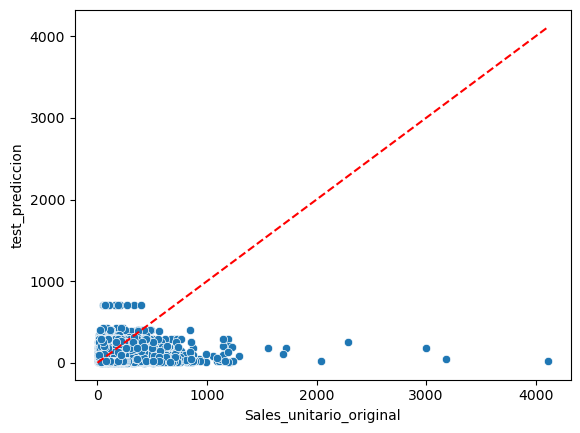

In [51]:
sns.scatterplot(x="Sales_unitario_original", y="test_prediccion", data= df_fin)
plt.plot([df_fin["Sales_unitario_original"].min(), df_fin["Sales_unitario_original"].max()],
         [df_fin["Sales_unitario_original"].min(), df_fin["Sales_unitario_original"].max()],
         color='red', linestyle='--', label='x = y')

***CONCLUSIONES DE ESTE MODELO 2 PARA INTENTAR MEJORAR***  
  
- Este modelo 2 me predice mal los Sales_unitario mayores a 600 aproximadamente (me predice los precios unitarios caros como baratos)  y un poco los Sales_unitario menores a 300 (algunos precios unitarios baratos me los predice como caros)  
